In [2]:
'''Cleared for use'''

import numpy as np
import pandas as pd
import CNNModelCWT as cnn_cwt

In [3]:
''' 
DO NOT EDIT THIS FUNCTION - REACH OUT TO NATE IF THERE ARE ISSUES WITH IT
'''

def cwt_cnn_model(fin_path=r'Data/Preprocessed/Continuous Wavelet Transformation/Labeled/',
         mout_path=r'Model Data/CNN Model/',dev_size=0.2,r_state=1,
         hyperparameters=None,fast=True,fil_id='0',use_trash=False,threshold=.98):

  #build dataframes for all data after splitting
  X_train,X_dev,y_train,y_dev=h.dfbuilder(fin_path=fin_path,dev_size=dev_size,r_state=r_state,directory=directory,use_trash=use_trash)

  #train a cnn model - v0.01
  cnn_model,cnn_hist=cnn_cwt.train_cnn_model(X_train,y_train,X_dev,y_dev,hyperparameters,fast,fil_id)
  pd.DataFrame(cnn_hist.history).to_csv(mout_path+fil_id+'hist.csv')

  #test cnn model with dev set
  cnn_cwt.test_cnn_model(cnn_model,X_dev,y_dev,test=False,threshold=threshold)

  #save model
  if not fast:
    cnn_cwt.save_model(cnn_model,mout_path+fil_id)

  return cnn_model

# **Use this space below for fiddling with model training**

### **If you need to retrain the model, be sure to restart the runtime**

In [4]:
'''define the hyperparameters here!'''
learning_rate=0.001
batch_size=100
drop_rate=0.55
epochs=50

#don't change the line below
hyperparameters=[learning_rate,batch_size,drop_rate,epochs]

In [5]:
'''define other parameters here!'''
#this string is prepended to all output files for identification
id_value='t_new_confmat_test'

#training data file path (do not include /content/drive/My Drive/ML Spectroscopy/)
fin_path=r'Data/Preprocessed/Continuous Wavelet Transformation/Labeled/'

#output file path for the trained model data
mout_path=r'Model Data/CNN Model/'

#proportion of the training data allocated to the dev set - a float x: 0<x<1
dev_size=0.2

#random seed used for train/dev split to ensure repeatable outcomes. None 
#provides a psuedorandom value that won't be repeatable
r_state=1

#fast - True for doing quick training that does not output probability weights
#for each sample during training. False for doing deep analysis and tracking
fast=True

#trash - True for using trash data in the model
trash=False

#synth - True for RRUFF Data
synth=False

#threshold - float in the range [0.0,1.0) determines the discrimination threshold
threshold=0.0


In [6]:
'''train the model'''
cnn_model=cwt_cnn_model(fin_path,mout_path,dev_size,r_state,hyperparameters,fast,id_value,use_trash=trash,threshold=threshold)

Master data set shape is (51266, 191) 


Epoch 1/50
411/411 [==============================] - 4s 11ms/step - loss: 0.3075 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.3560 - val_sparse_categorical_accuracy: 0.9886
Epoch 2/50
411/411 [==============================] - 4s 9ms/step - loss: 0.1038 - sparse_categorical_accuracy: 0.9995 - val_loss: 0.0790 - val_sparse_categorical_accuracy: 0.9995
Epoch 3/50
411/411 [==============================] - 4s 9ms/step - loss: 0.0405 - sparse_categorical_accuracy: 0.9996 - val_loss: 0.0347 - val_sparse_categorical_accuracy: 0.9994
Epoch 4/50
411/411 [==============================] - 4s 9ms/step - loss: 0.0174 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0108 - val_sparse_categorical_accuracy: 0.9996
Epoch 5/50
411/411 [==============================] - 4s 9ms/step - loss: 0.0083 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0070 - val_sparse_categorical_accuracy: 0.9997
Epoch 6/50
411/411 [==============================] - 4s 1

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10
true_0,1086,0,0,0,0,0,0,0,0,0,0
true_1,0,1228,0,0,0,0,0,0,0,0,0
true_2,0,0,994,0,0,0,0,0,0,0,3
true_3,0,0,0,1394,0,0,0,0,0,0,0
true_4,0,0,0,0,1254,0,0,0,0,0,0
true_5,0,0,0,0,0,1044,0,0,0,0,0
true_6,0,0,0,0,0,0,0,0,0,0,0
true_7,0,0,0,0,0,0,0,1050,0,0,0
true_8,0,0,0,0,0,0,0,0,1079,0,0
true_9,0,0,0,0,0,0,0,0,0,0,0


# **Test the model! Outside of function scope!**

Master data set shape is (5776, 191) 




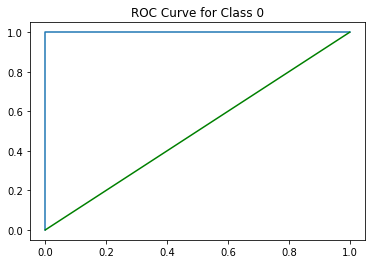

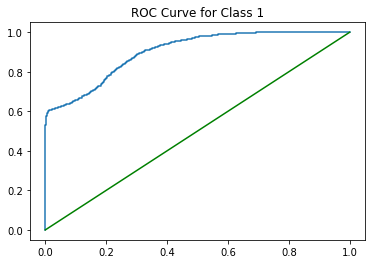

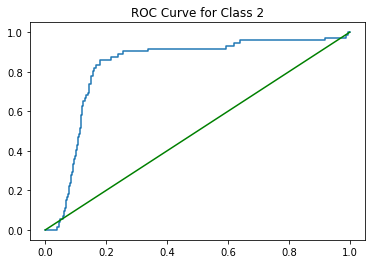

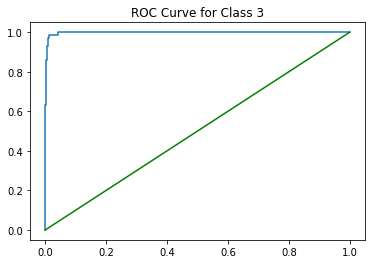

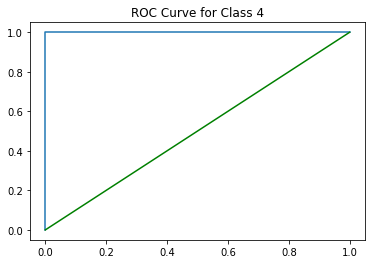

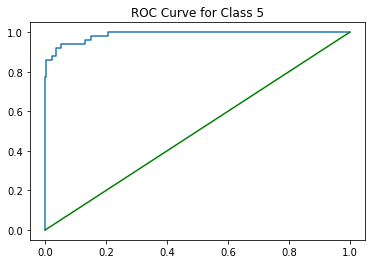

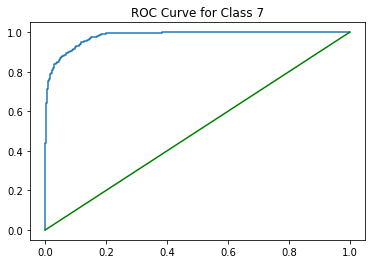

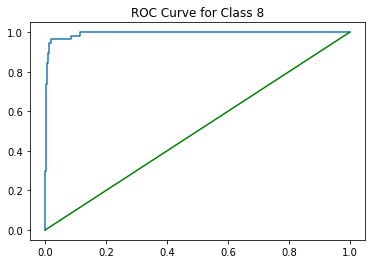

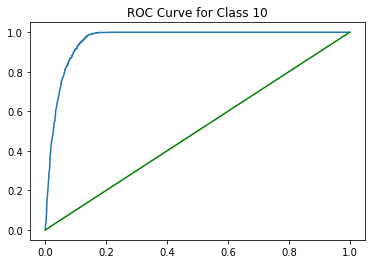

         pred_0  pred_1  pred_2  pred_3  ...  pred_7  pred_8  pred_9  pred_10
true_0     1556       0       0       0  ...       0       0       0        0
true_1        0     580       0       1  ...       0       0       0      610
true_2        4       0       0      13  ...       0       0       0        0
true_3        0       0       0     125  ...       0       0       0        0
true_4        0       0       0       0  ...       0       0       0        0
true_5        0       0       1       1  ...       0       1       0        8
true_6        0       0       0       0  ...       0       0       0        0
true_7        0       0      79      25  ...     123       0       0        4
true_8        0       0       7       3  ...       0       6       0        0
true_9        0       0       0       0  ...       0       0       0        0
true_10       0       0       0       0  ...       0       0       0     2089

[11 rows x 11 columns]


In [ ]:

#test data path - do not include /content/.../ML Spectroscopy/
testin_path=r'Data/Preprocessed/Continuous Wavelet Transformation/Test Set/Labeled/'

#build test set, drops samples with Null values
test_df=h.dfbuilder(testin_path,synth=synth,split_df=False,use_trash=trash)
test_df.dropna(inplace=True)

#separates features and labels
y_test=test_df[test_df.columns[-1]]
X_test=test_df.drop(test_df.columns[-1],axis=1).values

roc_out=h.roc_all(cnn_model.predict(X_test),y_test)

if not fast:
  roc_out.to_csv(mout_path+id_value+'roc_data.csv')

#tests model, you can also use model.predict outside of this scope
cnn_cwt.test_cnn_model(cnn_model,X_test,y_test,id_value)

#this is that old folder we were talking about where CNN.csv files get saved, i just commented it out and pointed it to the folder with the rest of the outputs
#saved_data=r'/content/drive/My Drive/ML Spectroscopy/Programs/Data Processing/Saved Lists/'
saved_data=r'/content/drive/My Drive/ML Spectroscopy/Model Data/CNN Model/'
pd.DataFrame(data=cnn_model.predict(X_test),index=test_df.index.values).to_csv(saved_data+id_value+r'CNN.csv')


# Play space for whatever other training/testing you want to do


Testing/Training Parameters

In [ ]:

'''define the hyperparameters here!'''
learning_rate=0.001
batch_size=100
drop_rate=0.55
epochs=50

#don't change the line below
hyperparameters=[learning_rate,batch_size,drop_rate,epochs]


In [ ]:

'''define other parameters here!'''
#this string is prepended to all output files for identification
id_value='multi_size_granite_only_update_with_probs'

#training data file path (do not include /content/drive/My Drive/ML Spectroscopy/)
fin_path=r'Data/Preprocessed/Continuous Wavelet Transformation/Labeled/'

#output file path for the trained model data
mout_path=r'Model Data/CNN Model/'

#proportion of the training data allocated to the dev set - a float x: 0<x<1
dev_size=0.2

#random seed used for train/dev split to ensure repeatable outcomes. None 
#provides a psuedorandom value that won't be repeatable
r_state=1

#fast - True for doing quick training that does not output probability weights
#for each sample during training. False for doing deep analysis and tracking
fast=False

#trash - True for using trash data in the model
trash=False

#threshold - float in the range [0.0,1.0) determines the discrimination threshold
threshold=0.0


Build a test set with out of class samples (RRUFF untrained data) and our in class test data set

In [ ]:
"""
#test data path - do not include /content/.../ML Spectroscopy/
testin_path1=r'Data/Preprocessed/Continuous Wavelet Transformation/Test Set/Labeled/'

#build test set, drops samples with Null values
test_df1=h.dfbuilder(testin_path1,synth=synth,split_df=False)
test_df1.dropna(inplace=True)


#test data path - do not include /content/.../ML Spectroscopy/
testin_path2=r'Data/Preprocessed/Continuous Wavelet Transformation/Test Set/RRUFF_untrained/Labeled/'

#build test set, drops samples with Null values
test_df2=h.dfbuilder(testin_path2,synth=True,split_df=False)
test_df2.dropna(inplace=True)

test_df=pd.concat([test_df1,test_df2])

test_df.loc[test_df['label']==9]=6

y_test=test_df[test_df.columns[-1]]
X_test=test_df.drop(test_df.columns[-1],axis=1).values
"""


"\n#test data path - do not include /content/.../ML Spectroscopy/\ntestin_path1=r'Data/Preprocessed/Continuous Wavelet Transformation/Test Set/Labeled/'\n\n#build test set, drops samples with Null values\ntest_df1=h.dfbuilder(testin_path1,synth=synth,split_df=False)\ntest_df1.dropna(inplace=True)\n\n\n#test data path - do not include /content/.../ML Spectroscopy/\ntestin_path2=r'Data/Preprocessed/Continuous Wavelet Transformation/Test Set/RRUFF_untrained/Labeled/'\n\n#build test set, drops samples with Null values\ntest_df2=h.dfbuilder(testin_path2,synth=True,split_df=False)\ntest_df2.dropna(inplace=True)\n\ntest_df=pd.concat([test_df1,test_df2])\n\ntest_df.loc[test_df['label']==9]=6\n\ny_test=test_df[test_df.columns[-1]]\nX_test=test_df.drop(test_df.columns[-1],axis=1).values\n"

Build test set with just granite data

In [ ]:

#test data path - do not include /content/.../ML Spectroscopy/
testin_path=r'Data/Preprocessed/Continuous Wavelet Transformation/Test Set/Labeled/'

#build test set, drops samples with Null values
test_df=h.dfbuilder(testin_path,synth=False,split_df=False)
test_df.dropna(inplace=True)

print(test_df)
y_test=test_df[test_df.columns[-1]]
X_test=test_df.drop(test_df.columns[-1],axis=1).values


Master data set shape is (5776, 191) 


                                       150       155  ...      1095  label
granite0dust_test_015s_5184-292  -0.014043  0.304867  ...  0.534140     10
granite0dust_test_015s_5184-529   0.009289  0.382101  ...  0.535629     10
granite0dust_test_015s_5184-2335  0.170840  0.662405  ...  0.431027     10
granite0dust_test_015s_5184-2505 -0.006646  0.311082  ...  0.538084     10
granite0dust_test_015s_5184-2647 -0.008310  0.302669  ...  0.532043     10
...                                    ...       ...  ...       ...    ...
gabbro0dust_test_015s_1020-1015  -0.019548  0.505443  ...  0.405214      7
gabbro0dust_test_015s_1020-1016  -0.025546  0.498728  ...  0.411627      7
gabbro0dust_test_015s_1020-1017  -0.022339  0.465547  ...  0.514873      7
gabbro0dust_test_015s_1020-1018  -0.043566  0.503578  ...  0.420759      1
gabbro0dust_test_015s_1020-1019  -0.032035  0.508674  ...  0.453980      1

[5776 rows x 191 columns]


Running model with limited data sets

In [ ]:

fin_path=r'Data/Preprocessed/Continuous Wavelet Transformation/Labeled/Limited Sizes/'

for i in [1,2,4,8,16,32,64,128,256,512,1024,2048,4096]:
  #adjusting some parameters for the size
  hyperparameters[1]=max([1,round(((i*9*4)/5)/411)])
  temp_id=id_value+str(i)
  
  print('\n\n\n\n', 'Model ',i,'\n')
  cnn_model=cwt_cnn_model(fin_path+str(i)+'/',mout_path,dev_size,r_state,hyperparameters,fast,temp_id,use_trash=trash,threshold=threshold)
  print('\nTest CM\n')
  cnn_cwt.test_cnn_model(cnn_model,X_test,y_test,temp_id,test=True,threshold=threshold,fast=fast)







 Model  1 

Master data set shape is (9, 191) 


Epoch 1/50
7/7 [==============================] - 1s 90ms/step - loss: 2.1998 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: nan - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 0s 51ms/step - loss: 2.1960 - sparse_categorical_accuracy: 0.1429 - val_loss: nan - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 0s 50ms/step - loss: 2.1940 - sparse_categorical_accuracy: 0.1429 - val_loss: nan - val_sparse_categorical_accuracy: 0.0000e+00
         pred_0  pred_1  pred_2  pred_3  ...  pred_7  pred_8  pred_9  pred_10
true_0        0       0       0       0  ...       0       0       0        0
true_1        0       0       0       0  ...       0       0       0        0
true_2        0       0       0       1  ...       0       0       0        0
true_3        0       0       0       0  ...       0       0       0        0
true_4        0    

In [ ]:
#print(roc_out)

In [ ]:
"""
opt_thresh=np.array((roc_out.columns.values.astype(float)))
for i in range(len(roc_out.columns)):
  tpr_ls,fpr_ls,thresh_ls=roc_out[roc_out.columns.values[i]]
  #print(np.subtract(tpr_ls,fpr_ls))
  opt_thresh[i]=thresh_ls[np.argmax(np.subtract(tpr_ls,fpr_ls))]
  print('Optimal Threshold for class:',roc_out.columns.values[i],'\n',opt_thresh[i])
print(opt_thresh.sum()*(1.0/len(opt_thresh)))
"""

"\nopt_thresh=np.array((roc_out.columns.values.astype(float)))\nfor i in range(len(roc_out.columns)):\n  tpr_ls,fpr_ls,thresh_ls=roc_out[roc_out.columns.values[i]]\n  #print(np.subtract(tpr_ls,fpr_ls))\n  opt_thresh[i]=thresh_ls[np.argmax(np.subtract(tpr_ls,fpr_ls))]\n  print('Optimal Threshold for class:',roc_out.columns.values[i],'\n',opt_thresh[i])\nprint(opt_thresh.sum()*(1.0/len(opt_thresh)))\n"

In [ ]:
"""
#tests model, you can also use model.predict outside of this scope
cnn_cwt.test_cnn_model(cnn_model,X_test,y_test,id_value,.0,fast=True)
"""

'\n#tests model, you can also use model.predict outside of this scope\ncnn_cwt.test_cnn_model(cnn_model,X_test,y_test,id_value,.0,fast=True)\n'

In [ ]:
#report metrics: precision, recall, f1-score, support for test set
from sklearn.metrics import classification_report
print(classification_report(y_test,cnn_cwt.dec_pred(cnn_model.predict(X_test),threshold)))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1557
           1       1.00      0.43      0.60      1323
           2       0.39      0.44      0.42        72
           3       0.74      0.99      0.85       134
           4       1.00      1.00      1.00         2
           5       1.00      0.69      0.82        49
           7       0.99      0.87      0.92       486
           8       0.94      0.89      0.92        57
          10       0.73      1.00      0.85      2096

    accuracy                           0.85      5776
   macro avg       0.87      0.81      0.82      5776
weighted avg       0.89      0.85      0.83      5776

